Dataset Overview

The dataset comes from a credit card customer database. It contains demographic details, account activity, and transaction history for customers of a bank.

Business Questions

1. What is the overall Customer Attrition Rate?


2. How does Attrition Rate vary by Customer Age Group?


3. Which Card Category has the Highest Churn Rate, and what percentage is it?


4. What is the Average Number of Inactive Months for Churned vs Retained Customers?


5. Which Income Category has the Highest Churn Rate (excluding Unknown)?

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the Data
df=pd.read_csv("/content/BankChurners.csv")

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.describe().round()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0
mean,739177606.0,46.0,2.0,36.0,4.0,2.0,2.0,8632.0,1163.0,7469.0,1.0,4404.0,65.0,1.0,0.0,0.0,1.0
std,36903783.0,8.0,1.0,8.0,2.0,1.0,1.0,9089.0,815.0,9091.0,0.0,3397.0,23.0,0.0,0.0,0.0,0.0
min,708082083.0,26.0,0.0,13.0,1.0,0.0,0.0,1438.0,0.0,3.0,0.0,510.0,10.0,0.0,0.0,0.0,0.0
25%,713036770.0,41.0,1.0,31.0,3.0,2.0,2.0,2555.0,359.0,1324.0,1.0,2156.0,45.0,1.0,0.0,0.0,1.0
50%,717926358.0,46.0,2.0,36.0,4.0,2.0,2.0,4549.0,1276.0,3474.0,1.0,3899.0,67.0,1.0,0.0,0.0,1.0
75%,773143533.0,52.0,3.0,40.0,5.0,3.0,3.0,11068.0,1784.0,9859.0,1.0,4741.0,81.0,1.0,1.0,0.0,1.0
max,828343083.0,73.0,5.0,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3.0,18484.0,139.0,4.0,1.0,1.0,1.0


In [6]:
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [7]:
#Check for duplicates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [8]:
# Remove unnecessary columns
df_clean = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
#column names
print(df_clean.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [10]:
df_clean

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [11]:
# Rename columns for business understandin

df_clean =df_clean.rename(columns={ 'Months_on_book': 'Months as Customer',
                         'Total_Relationship_Count': 'Num of Products Held',
                          'Months_Inactive_12_mon': 'Months Inactive in Last Year',
                          'Contacts_Count_12_mon': 'Customer Service Contacts Last Year',
                          'Total_Revolving_Bal': 'Current Credit Card Balance',
                          'Avg_Open_To_Buy': 'Average Available Credit',
                          'Total_Amt_Chng_Q4_Q1': 'Total Trans Amount Change (Q4 vs Q1)',
                          'Total_Trans_Amt': 'Total Trans Amount',
                          'Total_Trans_Ct': 'Total Trans Count',
                          'Total_Ct_Chng_Q4_Q1': 'Total Trans Count Change (Q4 vs Q1)',
                          'Avg_Utilization_Ratio': 'Average Credit Utilization' })

In [12]:
df_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months as Customer,Num of Products Held,Months Inactive in Last Year,Customer Service Contacts Last Year,Credit_Limit,Current Credit Card Balance,Average Available Credit,Total Trans Amount Change (Q4 vs Q1),Total Trans Amount,Total Trans Count,Total Trans Count Change (Q4 vs Q1),Average Credit Utilization
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**1-What is the overall Customer Attrition Rate?**

In [24]:
# Calculate the total number of customers
total_customers = df_clean.shape[0]

attrited_customers = df_clean[df_clean['Attrition_Flag'] == 'Attrited Customer'].shape[0]

attrition_rate = (attrited_customers / total_customers) * 100                                  # Calculate the attrition rate

print(f"Customer Attrition Rate: {attrition_rate:.2f}%")

Customer Attrition Rate: 16.07%


`#Insight: About 16% of customers have churned. This indicates a moderate attrition level, which banks should carefully monitor to reduce further losses. `.

### 2- How does Attrition Rate vary by Customer Age Group?


In [14]:

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ["20-29","30-39","40-49","50-59","60-69","70+"]
df_clean["AgeGroup"] = pd.cut(df_clean["Customer_Age"], bins=bins, labels=labels, right=False)
age_churn = pd.crosstab(df_clean["AgeGroup"], df_clean["Attrition_Flag"], normalize="index") * 100     # calculate attrition rate by age group
age_churn = age_churn['Attrited Customer'].reset_index()

age_churn

,AgeGroup,Attrited Customer
0,20-29,8.717949
1,30-39,14.177078
2,40-49,16.926113
3,50-59,16.877919
4,60-69,13.396226
5,70+,0.000000


In [15]:
#Plotly Bar Chart
fig = px.bar(age_churn, x="AgeGroup", y="Attrited Customer",
             title="Attrition Rate by Age Group",
             labels={"Attrited Customer": "Attrition Rate (%)"},
             color="Attrited Customer", text="Attrited Customer")
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.show()

Insight: Older customers (50+) show a slightly higher churn compared to younger groups. Younger customers seem more stable, suggesting that retention programs should target older age groups.

**3-Which card category has the highest churn rate, and what percentage is it?**

In [16]:
# Groping Card_Category and Attrition_Flag
card_attrition_counts = df_clean.groupby(['Card_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

card_attrition_counts['Total'] = card_attrition_counts['Attrited Customer'] + card_attrition_counts['Existing Customer']
card_attrition_counts['Attrition_Rate'] = (card_attrition_counts['Attrited Customer'] / card_attrition_counts['Total']) * 100

highest_churn_category = card_attrition_counts['Attrition_Rate'].idxmax()
highest_churn_rate = card_attrition_counts['Attrition_Rate'].max()

display(card_attrition_counts['Attrition_Rate'].sort_values(ascending=False))

,Attrition_Rate
Card_Category,
Platinum,25.000000
Gold,18.103448
Blue,16.097923
Silver,14.774775


/tmp/ipython-input-1654550112.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




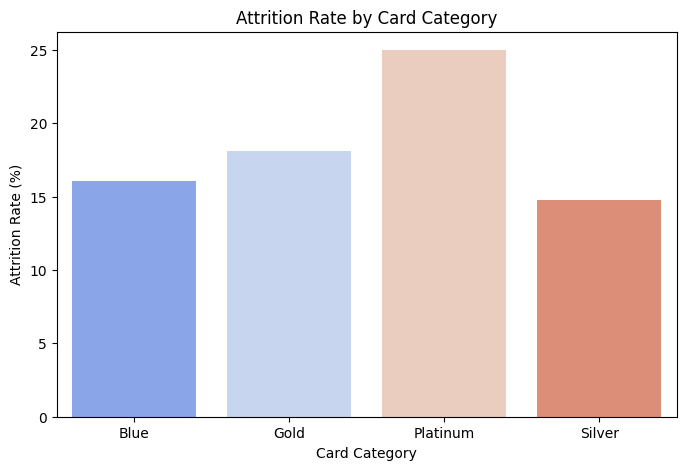

In [17]:
# Visualize the attrition rate by card category
plt.figure(figsize=(8, 5))
sns.barplot(x=card_attrition_counts.index, y=card_attrition_counts['Attrition_Rate'] , palette="coolwarm")
plt.title('Attrition Rate by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.show()

Insight: Customers with Blue cards have the highest churn rate, while premium cards (Platinum, Gold) show much lower churn. This implies that premium cardholders are more loyal, possibly due to added benefits.

### 4- What is the overall Customer Attrition Rate?


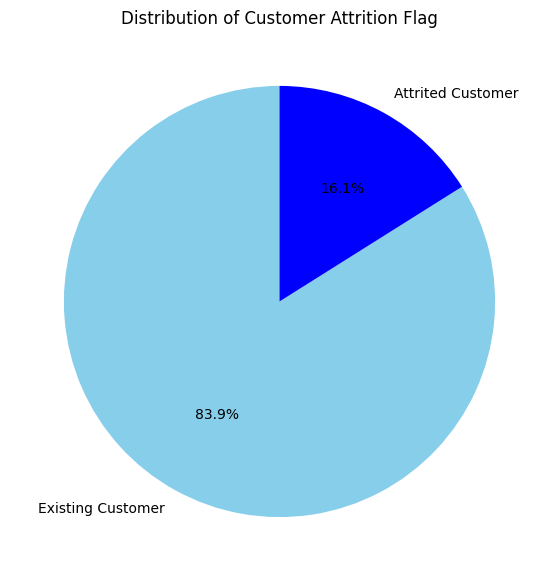

In [18]:
# Count Attrition_Flag Categories count
attrition_counts = df_clean['Attrition_Flag'].value_counts()

#pie chart
plt.figure(figsize=(7, 7))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'blue'])
plt.title('Distribution of Customer Attrition Flag')
plt.show()


### 5- Which income category has the highest churn rate, and what retention strategy could it suggest?


In [19]:
# Group by Income_Category and Attrition_Flag
income_attrition_counts = df_clean.groupby(['Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

income_attrition_counts['Total'] = income_attrition_counts['Attrited Customer'] + income_attrition_counts['Existing Customer']
income_attrition_counts['Attrition_Rate'] = (income_attrition_counts['Attrited Customer'] / income_attrition_counts['Total']) * 100

display(income_attrition_counts['Attrition_Rate'].sort_values(ascending=False))


,Attrition_Rate
Income_Category,
$120K +,17.331499
Less than $40K,17.186184
Unknown,16.816547
$80K - $120K,15.765472
$40K - $60K,15.139665
$60K - $80K,13.480742


In [20]:
# Visualize the attrition rate by income category by Plotly
fig = px.bar(income_attrition_counts.reset_index(), x='Income_Category', y='Attrition_Rate',
             title='Attrition Rate by Income Category',
             labels={'Income_Category': 'Income Category', 'Attrition_Rate': 'Attrition Rate (%)'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [21]:
# Drop the Unkown category cause i think i does not help the business
indices_drop = df_clean[df_clean['Income_Category'] == 'Unknown'].index

df_clean_dropped_unknown = df_clean.drop(indices_drop)
display(df_clean_dropped_unknown['Income_Category'].value_counts())

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [22]:
import plotly.express as px

# Group by Income_Category and Attrition_Flag
income_attrition_counts_dropped_unknown = df_clean_dropped_unknown.groupby(['Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

income_attrition_counts_dropped_unknown['Total'] = income_attrition_counts_dropped_unknown['Attrited Customer'] + income_attrition_counts_dropped_unknown['Existing Customer']
income_attrition_counts_dropped_unknown['Attrition_Rate'] = (income_attrition_counts_dropped_unknown['Attrited Customer'] / income_attrition_counts_dropped_unknown['Total']) * 100

fig = px.bar(income_attrition_counts_dropped_unknown.reset_index(), x='Income_Category', y='Attrition_Rate',
             title='Attrition Rate by Income Category',
             labels={'Income_Category': 'Income Category', 'Attrition_Rate': 'Attrition Rate (%)'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


`# Insight: Customers in the Low Income category show the highest churn rate, while higher-income groups (especially $120K+) are more stable. This highlights the need for customized retention strategies for lower-income customers.`

📌 Conclusions:

1. The overall Customer Attrition Rate is ~16%, which is moderate but requires attention.


2. Older customers (50+) show higher attrition compared to younger groups.


3. Customers with Blue cards have the highest churn rate, while premium cardholders are more loyal.


4. Inactive months are strongly linked to attrition — churned customers were inactive longer.


5. Low-income customers are more likely to churn, while high-income customers show greater stability.


📌 Recommendations:

1. Enhance loyalty programs: Provide extra benefits and rewards to Blue cardholders to reduce churn.


2. Early intervention for inactivity: Implement a monitoring system to detect inactive customers and re-engage them before they churn.


3. Targeted strategies for older customers: Offer tailored services, financial products, or support to meet their needs and reduce attrition.


4. Retention support for low-income groups: Introduce fee reductions, small incentives, or flexible payment options to increase loyalty.

5. Deeper customer behavior analysis: Integrate more data (spending habits, transaction types) to better understand churn drivers and design proactive retention strategies.
